## 5.1
>図 5.7 のグラフにおいて, $s$ から $t$ への最短路を求めよ.

$s \to v_2 \to v_4 \to v_5 \to t$.

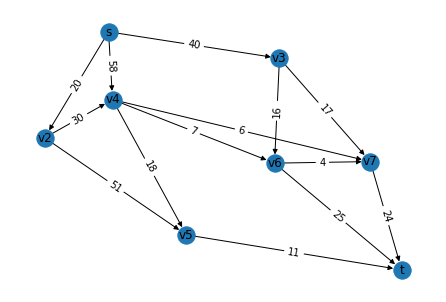

s-t最短路: ['s', 'v2', 'v4', 'v5', 't']


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(["s", "v2", "v3", "v4", "v5", "v6", "v7", "t"])
G.add_weighted_edges_from([
    ("s", "v2", 20),
    ("s", "v3", 40),
    ("s", "v4", 58),
    ("v2", "v4", 30),
    ("v2", "v5", 51),
    ("v3", "v6", 16),
    ("v3", "v7", 17),
    ("v4", "v5", 18),
    ("v4", "v6", 7),
    ("v4", "v7", 6),
    ("v5", "t", 11),
    ("v6", "v7", 4),
    ("v6", "t", 25),
    ("v7", "t", 24)
])
pos=nx.spring_layout(G, seed=8)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos,  with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
print("s-t最短路:", nx.dijkstra_path(G,'s','t'))

## 5.2
>最小木問題の解法として, クラスカルのアルゴリズムの正当性を示せ. また, プリムのアルゴリズムの正当性を示せ.

### クラスカルのアルゴリズムの正当性

まずクラスカルのアルゴリズム終了時に, $T$ が全域木となることを示す.
そのためには次の補題を示せばよい.

>補題. 連結な辺の部分集合 $E' \subset E$ と, $E'$ に含まれる辺の端点である点の集合 $V'$ についてクラスカルのアルゴリズムを適用すると, 結果として得られる $T'$ は $V'$ の全域木となっている.

**補題の証明**  
$|E'|$ についての帰納法によって示す.  
$|E'| = 1$ のときは明らか.  
$|E'| \le k - 1 \ (k \ge 2)$ で命題が成り立つとし, $|E'| = k$ の場合を考える.  
クラスカルのアルゴリズムを $e_{|E'|-1}$ まで行った時点で, 仮定より $T'$ は $E'\setminus\{e_{|E'|}\}$ の全域木となっている.  
i) $e_{|E'|}$ の両方の端点がすでに $T'$ に含まれているのであれば, すでに $T'$ は $V'$ の全域木.  
ii) $e_{|E'|}$ の端点の片方のみがすでに $T'$ に含まれるのであれば, $e_{|E'|}$ を加えて $T'$ は全域木になる.  
iii) $e_{|E'|}$ の両方の端点がまだ $T'$ に含まれないということはあり得ない, なぜならその場合 $E'$ が連結であるという仮定に反する.  
したがって, $|E'| = k$ の場合にも命題が成り立つ. $_\square$

よってクラスカルのアルゴリズム終了時に $T$ は全域木となる.

次に, クラスカルのアルゴリズム終了時に $T$ が最小木となることを示す.  
そのためには, 定理 5.1 より $T$ に含まれる任意の辺 $e$ が, 何らかのカットの最小辺であることを示せばよい.  
i) $e$ を $T$ に含める際, $e$ の両方の端点が $T$ に含まれていたとする. このとき, $e$ の片方の端点を含む $T$ 内の部分木を $S$ とすると, $e$ はカット $(S, V\setminus S)$ の最小辺である. なぜなら, この時点でこのカットに含まれる任意の辺を追加しても $T$ はサイクルにならないため, $e$ より小さい辺があるならすでに $T$ に含められているはずであるが, それは $S$ の定義に反するため.  
ii) $e$ を $T$ に含める際, $e$ の片方の端点が $T$ に含まれていたとする. このとき, $e$ は, i) と同じような理由でカット $(T, V - T)$ の最小辺である.   
iii) $e$ を $T$ に含める際, $e$ の両方の端点が $T$ に含まれていなかったとする. このとき, $e$ の片方の端点を $v_{e1}$ とすると, $e$ はカット $(\{v_{e1}\}, V - \{v_{e1}\})$ の最小辺である.  
したがって, 任意の $e \in T$ は何らかのカットの最小辺であり, よって $T$ は最小木である. $_\square$

### プリムのアルゴリズムの正当性
プリムのアルゴリズム終了時に全域木であることを示す。  
まず, どの時点でも $(S, V - S)$ のカットをえらんで加えるため, $T$ にサイクルができることはなく, アルゴリズム終了時に $T$ は部分木である.  
また, 終了時に $T$ が全域木でないとすると, 終了時点においてカット $(S, V - S)$ が空であることを意味するが, これは元のグラフが連結であることに反する.  
したがって, プリムのアルゴリズムは全域木を返す.

一方, プリムのアルゴリズムによって返される全域木に含まれる辺は, 常に何らかのカットの最小辺であることはアルゴリズムより明らかである. よって, アルゴリズム終了時の $T$ は最小全域木である. $_\square$

## 5.3
>第2最小全域木を返すアルゴリズムを考えよ.

最小全域木に含まれる辺のうち, 少なくとも1つは第2最小全域木に含まれない.  
なぜなら, 最小全域木に1つ以上の辺を加えると必ずサイクルができるため.  
したがって, 初めにクラスカル法で最小全域木を求めたあと, それに含まれる各辺 $e$ について, $e$ を除いたグラフの最小全域木をクラスカル法で求め, その内重みが最も小さいものを選べば良い.  
クラスカル法の計算量は $O(E\log E)$ であるため, このアルゴリズムは $O(E^2\log E)$ とであり, 多項式時間で解ける.

## 5.4

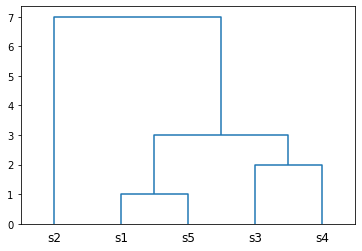

In [2]:
from scipy.cluster import hierarchy
import numpy as np

ytdist = np.array([
    8, 3,  6, 1,
       7, 10, 9,
           2, 4,
              5
])
Z = hierarchy.linkage(ytdist, 'single')
hierarchy.dendrogram(Z, color_threshold=0,labels=['s1', 's2', 's3', 's4', 's5'])
plt.show()

## 5.5
>最小費用流問題を利用することで輸送問題（1.1節の例1.2）を解く方法を考えよ.

>**最小費用問題**
>- 倉庫: $S_1, S_2, \dots, S_m$
>   - 倉庫 $S_i$ に保管してある供給量: $s_i$
>- 顧客: $C_1, C_2, \dots, C_n$
>   - 顧客 $C_j$ に納品すべき需要量: $d_j$
>- 倉庫 $S_i$ から顧客 $C_j$ への単位量当たり輸送費用: $c_{ij}$
>- 総輸送費用を最小化する輸送計画は？

以下のようにして構成された最小費用流問題を解けばよい.

- ノード: $V = \{S_1, S_2, \dots, S_m, C_1, C_2, \dots, C_n$\}
- エッジ: $E = \{ e_{ij} = (S_i, C_j) \mid 1\le i \le m, \ 1 \le j \le n \}$.
- 各倉庫 $S_i$ がソースで, $b_{S_i} = s_i$.
- 各顧客 $C_j$ がシンクで, $b_{C_j} = -d_j$.
- 各辺の容量は特になし: $c_{e_{ij}} = + \infty$.
- 各辺のコストは単位量当たり輸送費用: $w_{e_{ij}} = c_{ij}$

$$
\begin{align*}
    \min_{(f_{ij})} \ &\sum_{e_{ij} \in E} c_{ij} f_{ij}\\
    \mathrm{s.t.} \ &\sum_{j=1}^n f_{ij} =  s_i \ \ \mathrm{for} \ i = 1, \dots, m\\
    &-\sum_{i=1}^m f_{ij} = -d_j \ \ \mathrm{for}\ j = 1,\dots, n\\
    &f_{ij} \ge 0 \ \ \mathrm{for}\ i = 1 ,\dots, m, \ j = 1, \dots, n.
\end{align*}
$$

## 5.6
>2部グラフのマッチングのうちで辺の数が最大のものを求める問題を、**最大マッチング問題**とよぶ. 最大流問題を利用することで最大マッチング問題を解く方法を考えよ.

>**最大マッチング問題**  
>2部グラフ $((U, W), E)$（$E \subset U\times W$）に対して, 
>\begin{align*}
>\max_{E' \subseteq E} \ &|E'|\\
>\mathrm{s.t.}\ &\sum_{w \in W}1\{(u, w) \in E'\} \le 1 \ \ \mathrm{for} \ u \in U,\\
>&\sum_{u \in U}1\{(u, w) \in E'\} \le 1 \ \ \mathrm{for} \ w \in W.
>\end{align*}

次の有向グラフ
- ノード: $U\cup W \cup \{s, t\}$
- エッジ: $E \cup \{(s, u) \mid u \in U\} \cup \{(w, t) \mid w \in W\}$
- 重み（容量）: 全ての辺について $1$

を作り, $s$ から $t$ への最大流問題を解けばよい.